# Learn SciPy

In [5]:
import numpy as np
a = np.identity(3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
np.random.beta(5, 5, size=3)

array([0.09258121, 0.5963144 , 0.33955521])

/home/sjvasconcello/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


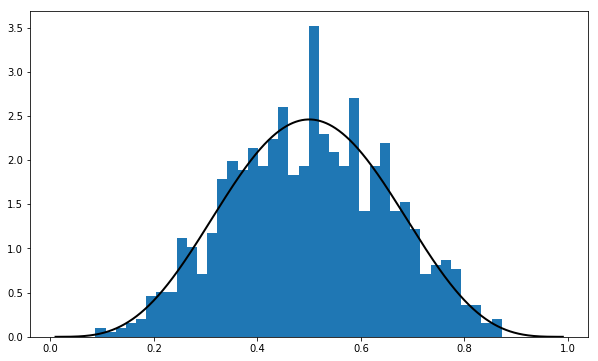

In [43]:
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

q = beta(5,5) # Beta(a,b),  with a = b = 5
obs = q.rvs(1000) # 2000 observations
grid = np.linspace(0.01, 0.99, 1000)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [44]:
q.cdf(0.2) # funcion de distribucion acumulativa

0.01958144000000001

In [45]:
q.pdf(0.5) # funcion densidad

2.460937500000001

In [46]:
q.ppf(0.5)      # Quantile (inverse cdf) function

0.49999999999999994

In [47]:
q.mean()

0.5

/home/sjvasconcello/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


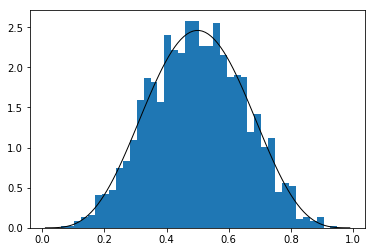

In [49]:
obs = beta.rvs(5,5, size=2000)
grid = np.linspace(0.01,0.99,100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid,beta.pdf(grid,5,5),'k-',linewidth=1)
plt.show()

### Roots and Fixed Points


$$f(x)= \sin(4(x-\frac{1}{4})) + x + x^{20} - 1$$

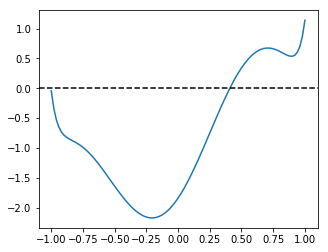

In [57]:
f = lambda x: np.sin(4*(x-1/4)) + x + x**20 - 1
x = np.linspace(-1,1,100)

plt.figure(figsize=(5,4))
plt.plot(x,f(x))
plt.axhline(ls='--',c='k')
plt.show()

### Bisection

In [58]:
def bisect(f, a, b, tol=10e-5):
    lowers, upper = a, b
    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:
            lower, upper = lower, middle
        else:
            lower, upper = middle, upper
    return 0.5 * (uppper + lower)

In [60]:
from scipy.optimize import bisect

bisect(f, 0 ,1)

0.4082935042806639

### The Newton-Raphson Method

In [61]:
from scipy.optimize import newton

newton(f, 0.2)

0.4082935042793568

In [64]:
newton(f,0.7)

0.7001700000000282

In [65]:
%timeit bisect(f, 0 ,1)

141 µs ± 4.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [66]:
%timeit newton(f, 0.2)

38.2 µs ± 328 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Hybird Methods

In [70]:
from scipy.optimize import brentq
brentq(f,0,1)

0.40829350427936706

In [71]:
%timeit brentq(f, 0, 1)

35.2 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Optimization

In [72]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)

0.0

## Integration

In [74]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2,0,1)
integral

0.33333333333333337

In [78]:
def bisect(f,a,b,tol=10e-5):
    lower, upper = a, b
    if upper - lower < tol:
        return 0.5 * (upper - lower)
    else:
        middle = 0.5 * (upper + lower)
        print(f'Current mid point = {middle}')
        if f(middle) > 0:
            bisect(f, lower, middle)
        else: 
            bisect(f, middle, upper)

f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

bisect(f, 0, 1)

Current mid point = 0.5
Current mid point = 0.25
Current mid point = 0.375
Current mid point = 0.4375
Current mid point = 0.40625
Current mid point = 0.421875
Current mid point = 0.4140625
Current mid point = 0.41015625
Current mid point = 0.408203125
Current mid point = 0.4091796875
Current mid point = 0.40869140625
Current mid point = 0.408447265625
Current mid point = 0.4083251953125
Current mid point = 0.40826416015625
